# Q1 

In [74]:
#importing important libraries
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
np.random.seed(15) #enrollment number is 20122026

In [76]:
bandit_means=np.random.uniform(0,1,10) #an instance of multi arm bandit with 10 bandits,mean of each of ehich lies between 0 and 1

In [77]:
bandit_means=list(bandit_means) #converting bandit_means to a list

In [78]:
print(bandit_means) #printing means of 10 bandits

[0.8488176972685787, 0.17889592492099848, 0.05436321430643143, 0.36153844608822294, 0.27540092860641197, 0.5300002248954253, 0.305918915735916, 0.3044743591541431, 0.1117412761755947, 0.24989901388011448]


In [79]:
epsilon=0.1 #epsilon paramter
T=10000 #horizon

In [80]:
# epsilon greedy 1 algorithm
def epsilon_greedy_1():
    
    
    #creating lists for each bandit to store the respective result for eg if bandit 1 is chosen then its reward will be added
    #to list b1 and similarly for other bandits

    b1=[]
    b2=[]
    b3=[]
    b4=[]
    b5=[]
    b6=[]
    b7=[]
    b8=[]
    b9=[]
    b10=[]
    
    exploration=[] #list to append all rewards while exploration
    
    reward=0 #initialising reward to zero
    
    for i in range (0,int(epsilon*T)): #exploration for epsilon*T time
        
        a=random.choice(bandit_means) #choosing an arm uniformly randomly
        arm_index=bandit_means.index(a) #index of the chosen arm
        
        # checking the randomly chosen index and getting the reward as 0 or 1 with probability of getting 1 as the bandit mean corresponding to the chosen arm
        # for eg if arm 1 is chosen then the reward will be 0 or 1 with probability of getting 1 equals bandit_means[0]


        if (arm_index==0):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b1.append(reward)
        elif (arm_index==1):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b2.append(reward)
        elif (arm_index==2):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b3.append(reward)
        elif (arm_index==3):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b4.append(reward)
        elif (arm_index==4):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b5.append(reward)
        elif (arm_index==5):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b6.append(reward)
        elif (arm_index==6):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b7.append(reward)
        elif (arm_index==7):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b8.append(reward)
        elif (arm_index==8):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b9.append(reward)
        elif (arm_index==9):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b10.append(reward)
        
        exploration.append(reward) #appending the reward at each step to the exploration rewards which will be used to plot later
        
        
    # function to calculate the average reward of each arm after exploration
    def average(list_arm):
        s=0
        for i in range (0,len(list_arm)):
            s = s + list_arm[i]
        return (s/len(list_arm))
    
    #calculating averages for each arm
    
    arm_averages=[average(b1),average(b2),average(b3),average(b4),average(b5),average(b6),
                  average(b7),average(b8),average(b9),average(b10)]

    best_arm=np.argmax(arm_averages) #choosing the best arm with the maximum average reward after exploration so that it can be exploited further
    
   
    # performing Exploitation
    overall_score=0 #calculating total score after exploitation
    score=0 #variable to store the reward at each step of exploitation
    
    exploitation=[] #list to append  exploitation rewards
    for i in range (int(epsilon*T),10000):
        score=random.choices([1,0],[bandit_means[best_arm],1-bandit_means[best_arm]],k=1)[0] #reward from the best arm
        exploitation.append(score)
        overall_score=overall_score+score
        
    # Calculating the total returns after EXPLORATION and EXPLOITATION
    
    total_score= overall_score + np.sum(exploration)
    
    all_scores= exploration + exploitation #complete list of rewards after exploration and exploitation
    
    return all_scores
    
    
    
    

In [81]:
# we will repeat the whole process 1000 times and then averaging the rewards
final_list=[0]*10000
for i in range (0,1000,1):
    iteration_scores=epsilon_greedy_1()
    final_list = np.add(iteration_scores,final_list).tolist() #final rewards after 1000 repititions 

In [82]:
# calculating average rewards
a=np.array(final_list)
expected_returns=(a/1000)


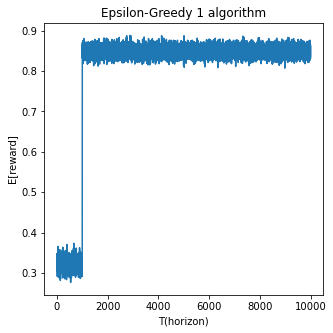

In [83]:
# plotting the rewards for epsilon greedy 1 algorithm
plt.figure(figsize=(5,5))
plt.plot(expected_returns)
plt.xlabel("T(horizon)")
plt.ylabel("E[reward]")
plt.title("Epsilon-Greedy 1 algorithm")
plt.show()

As we can see that the rewards are getting settled to some small interval after exploration as the best arm is being pulled again and again.

In [84]:
# epsilon greedy 2 algorithm

def epsilon_greedy_2():
    #creating lists for each bandit to store the respective result for eg if bandit 1 is chosen then its reward will be added
    #to list b1 and similarly for other bandits
    
    b1=[]
    b2=[]
    b3=[]
    b4=[]
    b5=[]
    b6=[]
    b7=[]
    b8=[]
    b9=[]
    b10=[]
    
    exploration=[] #list to append all rewards while exploration
    
    reward=0 #initialising reward to zero
    
    for i in range (0,int(epsilon*T)): #exploration for epsilon*T time
        
        a=random.choice(bandit_means) #choosing an arm uniformly randomly
        arm_index=bandit_means.index(a) #index of the chosen arm
        
        # checking the randomly chosen index and getting the reward as 0 or 1 with probability of getting 1 as the bandit mean corresponding to the chosen arm
        # for eg if arm 1 is chosen then the reward will be 0 or 1 with probability of getting 1 equals bandit_means[0]

        if (arm_index==0):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b1.append(reward)
        elif (arm_index==1):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b2.append(reward)
        elif (arm_index==2):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b3.append(reward)
        elif (arm_index==3):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b4.append(reward)
        elif (arm_index==4):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b5.append(reward)
        elif (arm_index==5):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b6.append(reward)
        elif (arm_index==6):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b7.append(reward)
        elif (arm_index==7):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b8.append(reward)
        elif (arm_index==8):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b9.append(reward)
        elif (arm_index==9):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b10.append(reward)
        
        exploration.append(reward) #appending the reward at each step to the exploration rewards which will be used to plot later
            
    
    # function to calculate the average reward of each arm after exploration
    def average(list_arm):
        s=0
        for i in range (0,len(list_arm)):
            s = s + list_arm[i]
        return (s/len(list_arm))
    
    #calculating averages for each arm
    def best_arm():
        arm_averages=[average(b1),average(b2),average(b3),average(b4),average(b5),average(b6),
                      average(b7),average(b8),average(b9),average(b10)]

        best_arm=np.argmax(arm_averages)
        return best_arm  #choosing the best arm with the maximum average reward after exploration so that it can be exploited further
    
       
    def exploitation():
        
        index=best_arm() #getting the best arm after calculating averages after exploration
        a=bandit_means[index] #getting bandit mean corresponding to best arm
        
        # we will get the reward corresponding to best arm and then append it to the corresponding list for eg b1 so that we 
        # can continously explore while exploiting
    
        if (index==0):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b1.append(reward)
        elif (index==1):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b2.append(reward)
        elif (index==2):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b3.append(reward)
        elif (index==3):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b4.append(reward)
        elif (index==4):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b5.append(reward)
        elif (index==5):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b6.append(reward)
        elif (index==6):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b7.append(reward)
        elif (index==7):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b8.append(reward)
        elif (index==8):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b9.append(reward)
        elif (index==9):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b10.append(reward)
            
        return reward
    # performing EXPLOITATION
    
    exploitation_rewards=[] #list to append exploitation rewards
    
    for i in range (int(epsilon*T),10000,1):
        exploitation_reward=exploitation()
        exploitation_rewards.append(exploitation_reward)
        
    all_scores = exploration + exploitation_rewards #final list of scores
    return all_scores
    

    
    
    
    

In [85]:
# repeating the experiment 100 times
final_list_2=[0]*10000
for i in range (0,100):
    iteration_scores=epsilon_greedy_2()
    final_list_2 = np.add(iteration_scores,final_list).tolist()

In [86]:
a2=np.array(final_list_2)
expected_returns_2=(a2/100) #average rewards for epsilon greedy 2


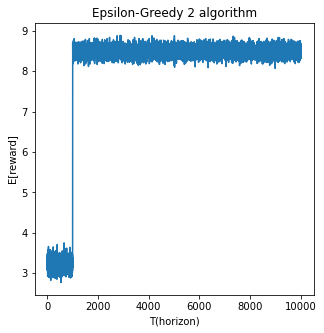

In [87]:
# plotting the epsilon greedy 2 algorithm
plt.figure(figsize=(5,5))
plt.plot(expected_returns_2)
plt.xlabel("T(horizon)")
plt.ylabel("E[reward]")
plt.title("Epsilon-Greedy 2 algorithm")
plt.show()


The graph for epsilon greedy 2 algorithm shows that exploration is happening along with exploitation.

In [88]:
# epsilon greedy 3 algorithm

def epsilon_greedy_3():
    
    
    #creating lists for each bandit to store the respective result for eg if bandit 1 is chosen then its reward will be added
    #to list b1 and similarly for other bandits
    # we initialise the lists to zero to handle the case of zero length

    b1=[0]
    b2=[0]
    b3=[0]
    b4=[0]
    b5=[0]
    b6=[0]
    b7=[0]
    b8=[0]
    b9=[0]
    b10=[0]
    
    
    exploration_rewards=[] # list to append exploration rewards
    
    exploitation_rewards=[] #list to append exploitation rewards
     
    reward=0
    
    # function for exploration
    def exploration():
        
        a=random.choice(bandit_means) #choosing an arm uniformly randomly
        arm_index=bandit_means.index(a) #index of the chosen arm
        
        # checking the randomly chosen index and getting the reward as 0 or 1 with probability of getting 1 as the bandit mean corresponding to the chosen arm
        # for eg if arm 1 is chosen then the reward will be 0 or 1 with probability of getting 1 equals bandit_means[0]

        if (arm_index==0):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b1.append(reward)
        elif (arm_index==1):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b2.append(reward)
        elif (arm_index==2):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b3.append(reward)
        elif (arm_index==3):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b4.append(reward)
        elif (arm_index==4):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b5.append(reward)
        elif (arm_index==5):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b6.append(reward)
        elif (arm_index==6):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b7.append(reward)
        elif (arm_index==7):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b8.append(reward)
        elif (arm_index==8):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b9.append(reward)
        elif (arm_index==9):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b10.append(reward)
        
        return reward
        
    # function to calculate average reward of each arm
    
    def average(list_arm):
        s=0
        for i in range (0,len(list_arm)):
            s = s + list_arm[i]
        return (s/len(list_arm))
    
    # choosing best arm based on average rewards of all arms
    
    def best_arm():
        
        arm_averages=[average(b1),average(b2),average(b3),average(b4),average(b5),average(b6),
                  average(b7),average(b8),average(b9),average(b10)]

        best_arm=np.argmax(arm_averages)
        
        return best_arm
    
    
    # function for exploitation
    
    def exploitation():
        
        index=best_arm() #choosing the best arm based on previous data
        a=bandit_means[index] # bandit mean corresponding to the best arm
    
        if (index==0):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b1.append(reward)
        elif (index==1):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b2.append(reward)
        elif (index==2):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b3.append(reward)
        elif (index==3):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b4.append(reward)
        elif (index==4):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b5.append(reward)
        elif (index==5):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b6.append(reward)
        elif (index==6):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b7.append(reward)
        elif (index==7):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b8.append(reward)
        elif (index==8):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b9.append(reward)
        elif (index==9):
            reward=random.choices([1,0],[a,1-a],k=1)[0]
            b10.append(reward)
            
        return reward

    
    # running the algorithm for T time steps and exploring with probability epsilon and exploiting with probability 0.9
        
    for i in range (0,T,1):
        choice=random.choices([0,1],[0.1,0.9],k=1)[0] # choice decides whether to explore or exploit
        if (choice==0):
            r=exploration()
            exploration_rewards.append(r)
        else:
            r=exploitation()
            exploitation_rewards.append(r)
            
    
    all_scores= exploration_rewards + exploitation_rewards
    return all_scores #final scores


In [89]:
# performing the algorithm for 100 times
final_list=[0]*10000
for i in range (0,100,1):
    iteration_scores=epsilon_greedy_3()
    final_list = np.add(iteration_scores,final_list).tolist()

In [90]:
# calculating average rewards
a3=np.array(final_list)
expected_returns_3=(a3/100)

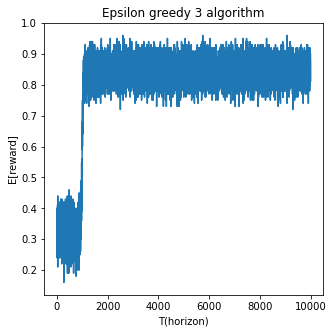

In [91]:
# plotting the results for epsilon greedy 3 algorithm
plt.figure(figsize=(5,5))
plt.plot(expected_returns_3)
plt.title("Epsilon greedy 3 algorithm")
plt.xlabel("T(horizon)")
plt.ylabel("E[reward]")
plt.show()

For epsilon greedy 3 algorithm there is more exploration than other two algorithms as can be seen in the variance of the rewards.